# Section 1 - Libs Import

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Section 2 - Datasets Import

## Section 2.1 - Transactions Dataset Import

In [4]:
caminho_arquivo = 'C:/Geral/Python/Case Incognia/Transacoes/Victor Wakai _ BASE 1 incognia-digital-banking-transactions - incognia-digital-banking-transactions.csv'

df_transac = pd.read_csv(caminho_arquivo)

df_transac.head(4)

tamanho_do_dataframe = df_transac.shape
print("Tamanho do DataFrame (linhas, colunas):", tamanho_do_dataframe)

df_transac = df_transac.drop_duplicates()

tamanho_do_dataframe = df_transac.shape
print("Tamanho do DataFrame (linhas, colunas):", tamanho_do_dataframe)

Tamanho do DataFrame (linhas, colunas): (409428, 12)
Tamanho do DataFrame (linhas, colunas): (409428, 12)


## Section 2.2 - Fraud Dataset Import

In [5]:
caminho_arquivo = 'C:/Geral/Python/Case Incognia/Fraude/Victor Wakai _ BASE 2 - incognia-digital-banking-transactions-fraud-feedback - incognia-digital-banking-transactions-fraud-feedback.csv'

df_fraude = pd.read_csv(caminho_arquivo)

df_fraude['fg_fraud'] = 1

df_fraude.head(4)

tamanho_do_dataframe = df_fraude.shape

print("Tamanho do DataFrame (linhas, colunas):", tamanho_do_dataframe)
df_fraude = df_fraude.drop_duplicates()
tamanho_do_dataframe = df_fraude.shape
print("Tamanho do DataFrame (linhas, colunas):", tamanho_do_dataframe)

Tamanho do DataFrame (linhas, colunas): (42590, 2)
Tamanho do DataFrame (linhas, colunas): (42402, 2)


In [6]:
merged_df = pd.merge(df_transac, df_fraude, on='transaction_id', how='left')
merged_df['fg_fraud'] = merged_df['fg_fraud'].fillna(0).astype(int)
merged_df.head(4)

,transaction_id,transaction_timestamp,account_id,device_id,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_tampered,transaction_value,client_decision,fg_fraud
0,691e8232-68b7,1693011151145,1877895943,1000002513,6.053,66,False,False,False,False,32.921,approved,0
1,64b4e6b8-dd66,1692027970161,616054714,1000006901,2.893,341,False,False,False,False,234.839,approved,0
2,9df0ac4c-2942,1692005618374,248051189,1000009259,6.322,157,False,False,False,False,84.473,denied,0
3,6847e894-2421,1690895607459,495694495,1000011126,0.425,22,False,False,False,False,281.682,approved,0


In [7]:
# Modeling timestamp 
merged_df['transaction_timestamp'] = merged_df['transaction_timestamp'].apply(lambda x: datetime.utcfromtimestamp(x / 1000))

# Removing timestamp and converting 
merged_df['transaction_timestamp'] = merged_df['transaction_timestamp'].apply(lambda x: x.replace(microsecond=0))

# Create 2 new columns based on the new timestamp
merged_df['data_transaction'] = merged_df['transaction_timestamp'].dt.date

merged_df['hour_transaction'] = merged_df['transaction_timestamp'].dt.time

merged_df = merged_df.drop(columns=['transaction_timestamp'])

merged_df.head(4)

,transaction_id,account_id,device_id,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_tampered,transaction_value,client_decision,fg_fraud,data_transaction,hour_transaction
0,691e8232-68b7,1877895943,1000002513,6.053,66,False,False,False,False,32.921,approved,0,2023-08-26,00:52:31
1,64b4e6b8-dd66,616054714,1000006901,2.893,341,False,False,False,False,234.839,approved,0,2023-08-14,15:46:10
2,9df0ac4c-2942,248051189,1000009259,6.322,157,False,False,False,False,84.473,denied,0,2023-08-14,09:33:38
3,6847e894-2421,495694495,1000011126,0.425,22,False,False,False,False,281.682,approved,0,2023-08-01,13:13:27


In [8]:
merged_df['data_transaction'] = pd.to_datetime(merged_df['data_transaction'])

# Create the week day based on the timestamp
merged_df['week_day_transation'] = merged_df['data_transaction'].dt.day_name()

In [9]:
# Round distance and transaction value to 2 decimals places
merged_df['distance_to_frequent_location'] = merged_df['distance_to_frequent_location'].round(2)
merged_df['transaction_value'] = merged_df['transaction_value'].round(2)

# Substitute client for 1 and 0
merged_df['client_decision'] = merged_df['client_decision'].replace({'approved': 1, 'denied': 0})

In [10]:
merged_df.head()

,transaction_id,account_id,device_id,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_tampered,transaction_value,client_decision,fg_fraud,data_transaction,hour_transaction,week_day_transation
0,691e8232-68b7,1877895943,1000002513,6.050,66,False,False,False,False,32.920,1,0,2023-08-26,00:52:31,Saturday
1,64b4e6b8-dd66,616054714,1000006901,2.890,341,False,False,False,False,234.840,1,0,2023-08-14,15:46:10,Monday
2,9df0ac4c-2942,248051189,1000009259,6.320,157,False,False,False,False,84.470,0,0,2023-08-14,09:33:38,Monday
3,6847e894-2421,495694495,1000011126,0.420,22,False,False,False,False,281.680,1,0,2023-08-01,13:13:27,Tuesday
4,a4a93162-a40f,1619461409,1000017604,10.510,0,False,False,False,False,65.960,1,0,2023-08-26,23:07:50,Saturday


# Section 3 - Exploratory Analysis

## Section 3.1 - Correlation Matrix

In [11]:
df_clean = merged_df.dropna()

In [12]:
colunas_selecionadas = ['device_age_days','distance_to_frequent_location', 'has_fake_location','has_root_permissions','app_is_tampered','transaction_value','client_decision']
df_clean = df_clean[colunas_selecionadas]

In [13]:
desc_stats = df_clean.describe()
print(desc_stats)

       device_age_days  distance_to_frequent_location  transaction_value  \
count       408174.000                     408174.000         408174.000   
mean           125.178                      14470.573            217.828   
std            119.638                     230509.954            392.508   
min              0.000                          0.000              1.750   
25%             20.000                          1.880             57.440   
50%             93.000                          5.850            109.180   
75%            215.000                         40.468            218.030   
max            366.000                   16500000.000          27230.350   

       client_decision  
count       408174.000  
mean             0.649  
std              0.477  
min              0.000  
25%              0.000  
50%              1.000  
75%              1.000  
max              1.000  


In [14]:
correlation_matrix = df_clean.corr()
print(correlation_matrix)

                               device_age_days  distance_to_frequent_location  \
device_age_days                          1.000                         -0.025   
distance_to_frequent_location           -0.025                          1.000   
has_fake_location                        0.011                         -0.000   
has_root_permissions                    -0.024                          0.004   
app_is_tampered                         -0.005                          0.031   
transaction_value                       -0.091                          0.106   
client_decision                          0.002                          0.004   

                               has_fake_location  has_root_permissions  \
device_age_days                            0.011                -0.024   
distance_to_frequent_location             -0.000                 0.004   
has_fake_location                          1.000                 0.006   
has_root_permissions                       0.006       

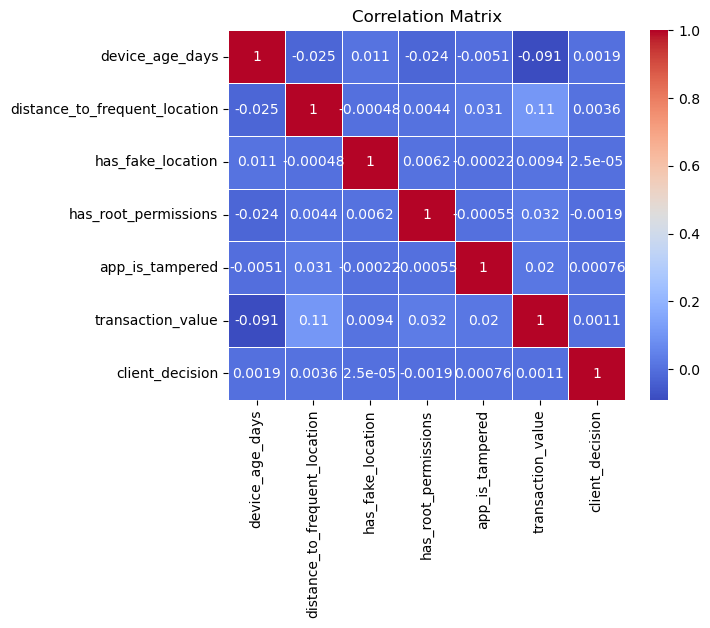

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Section 3.2 - Key Statistics

In [16]:
merged_df_clean = merged_df.dropna()

In [17]:
# Calculate median
mediana_coluna1 = np.median(merged_df_clean['distance_to_frequent_location'])
mediana_coluna2 = np.median(merged_df_clean['device_age_days'])
mediana_coluna3 = np.median(merged_df_clean['transaction_value'])

# Calculate mode
moda_coluna1 = merged_df_clean['distance_to_frequent_location'].mode()[0]
moda_coluna2 = merged_df_clean['device_age_days'].mode()[0]
moda_coluna3 = merged_df_clean['transaction_value'].mode()[0]

# Calculate varience
variancia_coluna1 = np.var(merged_df_clean['distance_to_frequent_location'])
variancia_coluna2 = np.var(merged_df_clean['device_age_days'])
variancia_coluna3 = np.var(merged_df_clean['transaction_value'])

print("Median distance_to_frequent_location:", mediana_coluna1)
print("Median device_age_days:", mediana_coluna2)
print("Median transaction_value:", mediana_coluna3)
print("Mode distance_to_frequent_location:", moda_coluna1)
print("Mode device_age_days:", moda_coluna2)
print("Mode transaction_value:", moda_coluna3)
print("Variance distance_to_frequent_location:", variancia_coluna1)
print("Variance device_age_days:", variancia_coluna2)
print("Variance transaction_value:", variancia_coluna3)

Median distance_to_frequent_location: 5.85
Median device_age_days: 93.0
Median transaction_value: 109.18
Mode distance_to_frequent_location: 0.11
Mode device_age_days: 0
Mode transaction_value: 50.94
Variance distance_to_frequent_location: 53134708761.477684
Variance device_age_days: 14313.1158415774
Variance transaction_value: 154062.4723228233


In [18]:
def calcular_frequencia(merged_df_clean, coluna):
    # Absolute frequency
    frequencia_absoluta = merged_df_clean[coluna].value_counts()
    
    # Relative Frequency
    frequencia_relativa = frequencia_absoluta / len(merged_df_clean[coluna])
    
    return frequencia_absoluta, frequencia_relativa

# Calculation
colunas = ['transaction_id', 'account_id', 'device_id', 'is_emulator', 
           'has_fake_location', 'has_root_permissions', 'app_is_tampered', 
           'client_decision', 'fg_fraud', 'data_transaction', 'hour_transaction']

for coluna in colunas:
    frequencia_absoluta, frequencia_relativa = calcular_frequencia(merged_df_clean, coluna)
    print(f"Absolute frequence of {coluna}:")
    print(frequencia_absoluta)
    print(f"\nRelative frequence of {coluna}:")
    print(frequencia_relativa)
    print("\n" + "="*50 + "\n")

Absolute frequence of transaction_id:
transaction_id
0.00E+00         136
2d47735f-4735      2
b6506d64-0a64      2
1d423f90-d8a9      2
4b295382-3ac7      2
                ... 
666293be-6bdb      1
6088a699-6e3b      1
03755dd3-a710      1
64ba1c9c-fe55      1
46db02ac-4039      1
Name: count, Length: 408035, dtype: int64

Relative frequence of transaction_id:
transaction_id
0.00E+00        0.000
2d47735f-4735   0.000
b6506d64-0a64   0.000
1d423f90-d8a9   0.000
4b295382-3ac7   0.000
                 ... 
666293be-6bdb   0.000
6088a699-6e3b   0.000
03755dd3-a710   0.000
64ba1c9c-fe55   0.000
46db02ac-4039   0.000
Name: count, Length: 408035, dtype: float64


Absolute frequence of account_id:
account_id
665706752     2
1686075381    2
1052857336    2
562380850     2
1800707705    2
             ..
1234988154    1
748905535     1
1356655991    1
1551883995    1
1571905742    1
Name: count, Length: 408140, dtype: int64

Relative frequence of account_id:
account_id
665706752    0.000
1686

In [19]:
tamanho_do_dataframe = merged_df_clean.shape
print("Dataframe size (linhas, colunas):", tamanho_do_dataframe)

duplicatas = merged_df_clean.duplicated().sum()
print("Duplicated in the Dataframe:", duplicatas)

valores_nulos = merged_df_clean.isnull().sum()
print("Null values in the Dataset:\n", valores_nulos)

Dataframe size (linhas, colunas): (408174, 15)
Duplicated in the Dataframe: 0
Null values in the Dataset:
 transaction_id                   0
account_id                       0
device_id                        0
distance_to_frequent_location    0
device_age_days                  0
is_emulator                      0
has_fake_location                0
has_root_permissions             0
app_is_tampered                  0
transaction_value                0
client_decision                  0
fg_fraud                         0
data_transaction                 0
hour_transaction                 0
week_day_transation              0
dtype: int64


In [20]:
tipos_de_dados = merged_df_clean.dtypes
print("Data type:\n", tipos_de_dados)

Data type:
 transaction_id                           object
account_id                                int64
device_id                                 int64
distance_to_frequent_location           float64
device_age_days                           int64
is_emulator                              object
has_fake_location                          bool
has_root_permissions                     object
app_is_tampered                          object
transaction_value                       float64
client_decision                           int64
fg_fraud                                  int32
data_transaction                 datetime64[ns]
hour_transaction                         object
week_day_transation                      object
dtype: object


In [21]:
print("Unique values:\n",merged_df_clean.nunique())

Unique values:
 transaction_id                   408035
account_id                       408140
device_id                        320308
distance_to_frequent_location     89488
device_age_days                     367
is_emulator                           1
has_fake_location                     2
has_root_permissions                  2
app_is_tampered                       2
transaction_value                 75825
client_decision                       2
fg_fraud                              2
data_transaction                     31
hour_transaction                  79004
week_day_transation                   7
dtype: int64


In [22]:
estatisticas_basicas = merged_df_clean.describe()
print("Bais Statistics:\n", estatisticas_basicas)

Bais Statistics:
           account_id      device_id  distance_to_frequent_location  \
count     408174.000     408174.000                     408174.000   
mean  1072195171.983 1068791723.239                      14470.573   
min         6096.000      12552.000                          0.000   
25%    535830910.500  530227921.500                          1.880   
50%   1070385484.500 1069450981.500                          5.850   
75%   1609972372.000 1603147323.250                         40.468   
max   2147481440.000 2147471561.000                   16500000.000   
std    620354443.212  620198754.849                     230509.954   

       device_age_days  transaction_value  client_decision   fg_fraud  \
count       408174.000         408174.000       408174.000 408174.000   
mean           125.178            217.828            0.649      0.104   
min              0.000              1.750            0.000      0.000   
25%             20.000             57.440            0.000 

## Section 3.3 - Account and Device Distribution

In [38]:
count_account_per_device = merged_df_clean.groupby('device_id')['account_id'].nunique()

# Create 'number_account_per_device' 
merged_df_clean.loc[:, 'number_account_per_device'] = merged_df_clean['device_id'].map(count_account_per_device)

count_devices_per_account = merged_df_clean.groupby('account_id')['device_id'].nunique()

# Create 'number_devices_per_account'
merged_df_clean.loc[:, 'number_devices_per_account'] = merged_df_clean['account_id'].map(count_devices_per_account)

In [39]:
def definir_quebra(numero):
    if numero == 1:
        return '1'
    elif 2 <= numero <= 3:
        return '2 - 3'
    elif 4 <= numero <= 10:
        return '4 - 10'
    elif 11 <= numero <= 50:
        return '11 - 50'
    else:
        return '50+'

# Create new column based on the above function
merged_df_clean.loc[:, 'group_account_per_device'] = merged_df_clean['number_account_per_device'].apply(definir_quebra)

In [26]:
merged_df_clean.head()

,transaction_id,account_id,device_id,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_tampered,transaction_value,client_decision,fg_fraud,data_transaction,hour_transaction,week_day_transation,number_account_per_device,number_devices_per_account,group_account_per_device
0,691e8232-68b7,1877895943,1000002513,6.050,66,False,False,False,False,32.920,1,0,2023-08-26,00:52:31,Saturday,1,1,1
1,64b4e6b8-dd66,616054714,1000006901,2.890,341,False,False,False,False,234.840,1,0,2023-08-14,15:46:10,Monday,1,1,1
2,9df0ac4c-2942,248051189,1000009259,6.320,157,False,False,False,False,84.470,0,0,2023-08-14,09:33:38,Monday,1,1,1
3,6847e894-2421,495694495,1000011126,0.420,22,False,False,False,False,281.680,1,0,2023-08-01,13:13:27,Tuesday,1,1,1
4,a4a93162-a40f,1619461409,1000017604,10.510,0,False,False,False,False,65.960,1,0,2023-08-26,23:07:50,Saturday,1,1,1


# Section 4 - Risk Classification

In [27]:
# Identify the percentile 85
percentil_85 = merged_df_clean['distance_to_frequent_location'].quantile(0.85)
print(percentil_85)

907.974499999999


In [28]:
# Identify the percentile 85
percentil_75 = merged_df_clean['transaction_value'].quantile(0.75)
print(percentil_75)

218.03


In [40]:
# Define the risk classification function
def classify_risk(row):
    
    # Hour boundaries
    limite_inferior = datetime.strptime('22:00:00', '%H:%M:%S').time()
    limite_superior = datetime.strptime('06:00:00', '%H:%M:%S').time()
    
    # Check for immediate high risk conditions
    if row['app_is_tampered'] == True or row['has_fake_location'] == True or row['has_root_permissions'] == True or row['number_account_per_device'] > 10:
        return 'High Risk'

    # Initialize risk score
    risk_score = 0

    # These thresholds are arbitrary and should be adjusted based on domain knowledge
    if row['distance_to_frequent_location'] > 907: # Usando P85
        risk_score += 1 * 2
    if row['device_age_days'] > 0 and row['device_age_days'] < 141:  # Usando os dias com maior percentual de risco
        risk_score += 1 * 1
    if row['transaction_value'] > 218:  # Assuming higher transaction values are riskier
        risk_score += 1 * 1 # 2
    if row['hour_transaction'] > limite_inferior and row['hour_transaction'] < limite_superior:  # Assuming late night transactions are riskier
        risk_score += 1 * 1
    if row['client_decision'] == 0: #0
        risk_score += 1 * 1 #1
    if row['app_is_tampered'] == False:
        risk_score += 1 * 1
    if row['has_fake_location'] == False:
        risk_score += 1 * 1
    if row['has_root_permissions'] == False:
        risk_score += 1 * 1
    if row['number_account_per_device'] > 3 and row['number_account_per_device'] < 10 :
        risk_score += 1 * 2 #3

    # Define risk classification based on risk score
    if risk_score >= 9: #10
        return 'High Risk'
    elif risk_score >= 6 and risk_score < 9: 
        return 'Medium Risk'
    else:
        return 'Low Risk'

merged_df_clean.loc[:, 'risk_score'] = merged_df_clean.apply(classify_risk, axis=1)

In [30]:
# Check model accuracy
transacoes_agrupadas = merged_df_clean.groupby('risk_score').agg(
    quantidade_transacoes=('transaction_id', 'count'),
    quantidade_fg_fraud=('fg_fraud', 'sum')
).reset_index()
 
# Show results
print(transacoes_agrupadas)

    risk_score  quantidade_transacoes  quantidade_fg_fraud
0    High Risk                  26007                20152
1     Low Risk                 298628                 3837
2  Medium Risk                  83539                18388


# Section 5 - Decision Flow 2.0

In [31]:
def calculate_transaction_value(risk_score, client_decision, fg_fraud, transaction_value):
    if risk_score == "High Risk" and client_decision == 1 and fg_fraud == 0:
        return transaction_value * 0.18 - 0.05
    elif risk_score == "Medium Risk" and client_decision == 1 and fg_fraud == 0:
        return transaction_value * 0.17 - 0.05
    elif risk_score == "Low Risk" and client_decision == 1 and fg_fraud == 0:
        return transaction_value * 0.16 - 0.05
    elif risk_score == "High Risk" and client_decision == 1 and fg_fraud == 1:
        return ((transaction_value * 0.18 - 0.05) * -1) * 0.75
    elif risk_score == "Medium Risk" and client_decision == 1 and fg_fraud == 1:
        return ((transaction_value * 0.17 - 0.05) * -1) * 0.9
    elif risk_score == "Low Risk" and client_decision == 1 and fg_fraud == 1:
        return ((transaction_value * 0.16 - 0.05) * -1) * 0.95
    
    
    elif risk_score == "High Risk" and client_decision == 0 and fg_fraud == 1:
        return transaction_value * 0
    elif risk_score == "Medium Risk" and client_decision == 0 and fg_fraud == 1:
        return transaction_value * 0
    elif risk_score == "Low Risk" and client_decision == 0 and fg_fraud == 1:
        return transaction_value * 0
    elif risk_score == "High Risk" and client_decision == 0 and fg_fraud == 0:
        return transaction_value * 0
    elif risk_score == "Medium Risk" and client_decision == 0 and fg_fraud == 0:
        return transaction_value * 0
    elif risk_score == "Low Risk" and client_decision == 0 and fg_fraud == 0:
        return transaction_value * 0

In [41]:
for index, row in merged_df_clean.iterrows():
    merged_df_clean.loc[index, 'calculated_value'] = calculate_transaction_value(row['risk_score'], 
                                                                     row['client_decision'], 
                                                                     row['fg_fraud'], 
                                                                     row['transaction_value'])

In [33]:
new_dec_flow= merged_df_clean['calculated_value'].sum()
print(new_dec_flow)

3874193.4442999996


In [34]:
soma_por_categoria = merged_df_clean.groupby('risk_score')['calculated_value'].sum()
print(soma_por_categoria)

risk_score
High Risk     -1242578.666
Low Risk       4658246.586
Medium Risk     458525.524
Name: calculated_value, dtype: float64


## Section 5.1 - Old Decision

In [35]:
def old_decision_flow(transaction_value, client_decision, fg_fraud): # assuming that declined by the client doesn't generate gains or loses, it has the cost for the 2 FA
    if client_decision == 1 and fg_fraud == 0:
        return (transaction_value * 0.15) - 0.05
    elif client_decision == 1 and fg_fraud == 1:
        return ((transaction_value * 0.15) * -1) - 0.05
    elif client_decision == 0 and fg_fraud == 0:
        return -0.05
    else:
        return -0.05

In [42]:
for index, row in merged_df_clean.iterrows():
    merged_df_clean.loc[index, 'old_dec_flow'] = old_decision_flow(row['transaction_value'], 
                                                                    row['client_decision'], 
                                                                    row['fg_fraud'])

In [37]:
old_dec_flow = merged_df_clean['old_dec_flow'].sum()
print(old_dec_flow)

3136740.9614999997
